<a href="https://colab.research.google.com/github/MMoltira/AIprototype2022/blob/main/Tensorflow(network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequentail - สร้างง่าย แต่ได้ network ธรรมดา (ไม่ซับซ้อน) วิ่งเป็นเส้นตรง
2. Functional - สร้างยากกว่า Sequentail (ซับซ้อนกว่า) ได้ network ที่แปลกกว่า / ปรับเส้นทางให้มีความซับซ้อนได้
3. Subclassing - ยากสุด แต่สามารถแก้ไขได้ตามที่ต้องการ #ไม่ได้เรียน

#Sequentail

Import

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Define

In [3]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

Train (รวมการนำข้อมูลใน colab notebook หน้า)

Predict

In [4]:
# Call model on a test input
x = tf.ones((5, 4))
y = model(x)

In [5]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [6]:
y

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[-0.00775668,  0.02910231,  0.22234292,  0.19439149],
       [-0.00775668,  0.02910231,  0.22234292,  0.19439149],
       [-0.00775668,  0.02910231,  0.22234292,  0.19439149],
       [-0.00775668,  0.02910231,  0.22234292,  0.19439149],
       [-0.00775668,  0.02910231,  0.22234292,  0.19439149]],
      dtype=float32)>

model2 แบบ 2

In [7]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(4))

In [8]:
# Define Sequential model with 3 layers
model3 = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

In [9]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [10]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


ปรับเปลี่ยน network

In [11]:
model2.pop()

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [13]:
model2.add(layers.Dense(6))

In [14]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Call model on a test input
x = tf.ones((5, 4))
y = model(x)
y

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[-0.00775668,  0.02910231,  0.22234292,  0.19439149],
       [-0.00775668,  0.02910231,  0.22234292,  0.19439149],
       [-0.00775668,  0.02910231,  0.22234292,  0.19439149],
       [-0.00775668,  0.02910231,  0.22234292,  0.19439149],
       [-0.00775668,  0.02910231,  0.22234292,  0.19439149]],
      dtype=float32)>

train sequential ที่สร้างขึ้นเอง

In [16]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [17]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


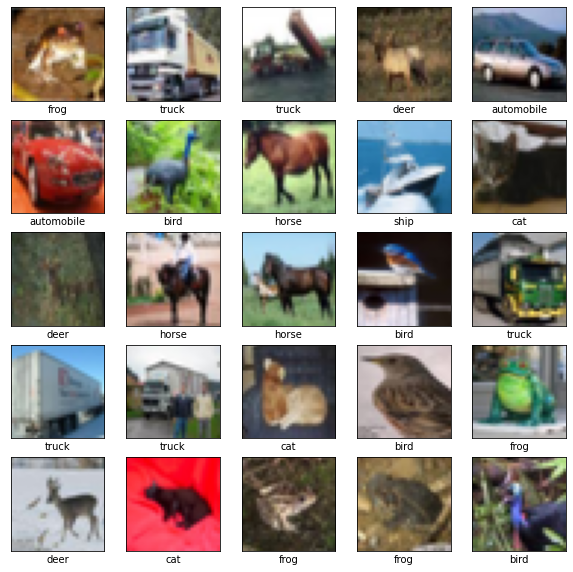

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 22s 9ms/step - loss: 1.5260 - accuracy: 0.4406 - val_loss: 1.2056 - val_accuracy: 0.5710
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1363 - accuracy: 0.5969 - val_loss: 1.0972 - val_accuracy: 0.6167
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9907 - accuracy: 0.6510 - val_loss: 1.0021 - val_accuracy: 0.6546
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8977 - accuracy: 0.6859 - val_loss: 0.9297 - val_accuracy: 0.6762
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8267 - accuracy: 0.7101 - val_loss: 0.8985 - val_accuracy: 0.6940
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7668 - accuracy: 0.7316 - val_loss: 0.9341 - val_accuracy: 0.6770
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7171 - accuracy: 0.7481 - val_loss: 0.8725 - val_ac

313/313 - 1s - loss: 0.8882 - accuracy: 0.7210 - 1s/epoch - 4ms/step


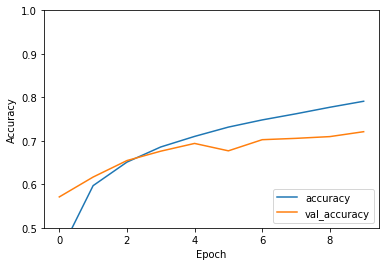

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [26]:
print(test_acc)

0.7210000157356262


Define (Create the convolutional base)

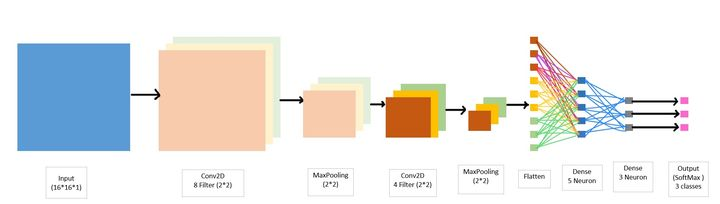

#fucntional

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((3, 3)))
# model.add(layers.Conv2D(128, (1, 1), activation='relu'))

# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation="relu"))
# model.add(layers.Dense(10))

In [29]:
input_image = keras.Input(shape=(32, 32, 3), name="img")
model = layers.Conv2D(32, (3,3), activation="relu", name="conv1")(input_image)
model = layers.MaxPooling2D((2,2), name="maxp1")(model)
model = layers.Conv2D(64, (3,3), activation="relu", name="conv2")(model)
model = layers.MaxPooling2D((2,2), name="maxp2")(model)
model = layers.Conv2D(64, (3,3), activation="relu", name="conv3")(model)
model = layers.Flatten()(model)
model = layers.Dense(64, activation="relu")(model)
output = layers.Dense(10)(model)

In [30]:
my_model = keras.Model(input_image, output, name= "mymodel")

In [31]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxp1 (MaxPooling2D)        (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxp2 (MaxPooling2D)        (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0   

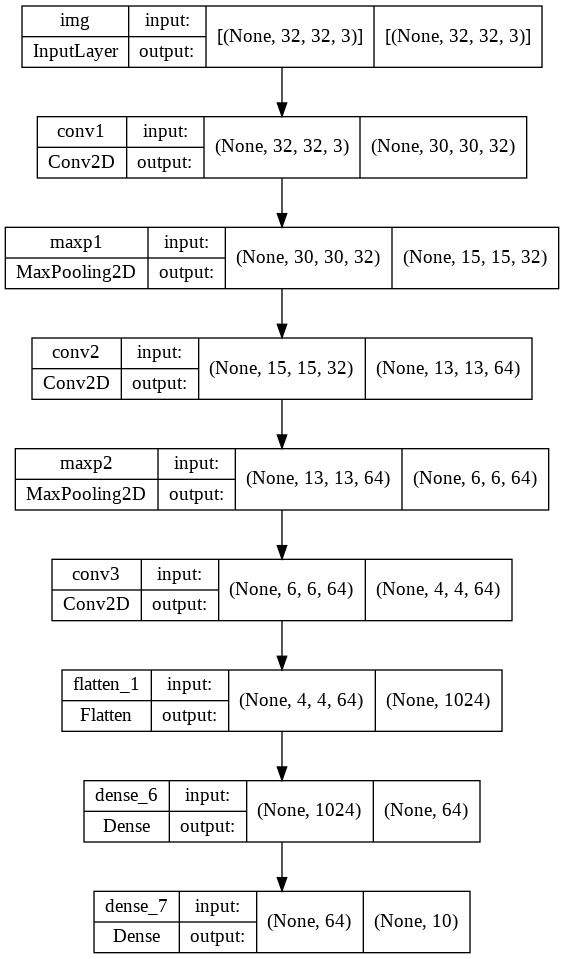

In [32]:
keras.utils.plot_model(my_model,show_shapes=True)

In [33]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
history = my_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5348 - accuracy: 0.4395 - val_loss: 1.2243 - val_accuracy: 0.5627
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1714 - accuracy: 0.5851 - val_loss: 1.0965 - val_accuracy: 0.6145
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0281 - accuracy: 0.6367 - val_loss: 0.9782 - val_accuracy: 0.6548
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9269 - accuracy: 0.6731 - val_loss: 1.0160 - val_accuracy: 0.6482
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8584 - accuracy: 0.6973 - val_loss: 0.8950 - val_accuracy: 0.6852
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7962 - accuracy: 0.7221 - val_loss: 0.8890 - val_accuracy: 0.6953
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7487 - accuracy: 0.7378 - val_loss: 0.8665 - val_ac

313/313 - 1s - loss: 0.8624 - accuracy: 0.7082 - 1s/epoch - 4ms/step


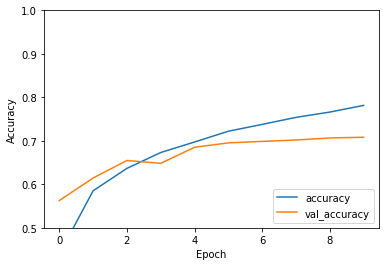

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [36]:
print(test_acc)

0.7081999778747559


#ResNet Modify

#HW

modify my_model ให้มี skip connections แล้ว train-test เทียบกับ 'my_model' และ 'resnet model'

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
input_image = keras.Input(shape=(32, 32, 3), name="img")
model = layers.Conv2D(32, (3,3), activation="relu")(input_image)
model = layers.Conv2D(64, (3,3), activation="relu")(model)
block_model1 = layers.MaxPooling2D(2,2)(model)

model = layers.Conv2D(64, 3, activation="relu", padding="same")(block_model1)
model = layers.Conv2D(64, 3, activation="relu", padding="same")(model)
block_model2 = layers.add([model,block_model1])

model = layers.Conv2D(64, 3, activation="relu")(block_model2)
model = layers.GlobalAveragePooling2D()(model)
model = layers.Flatten()(model)
model = layers.Dense(64, activation="relu")(model)
output = layers.Dense(10)(model)

In [39]:
model_res = keras.Model(input_image, output, name="Model_resnet")
model_res.summary()

Model: "Model_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_4 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_3[0][0]']               
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 64)  0           ['conv2d_4[0][0]']               
                                                                                       

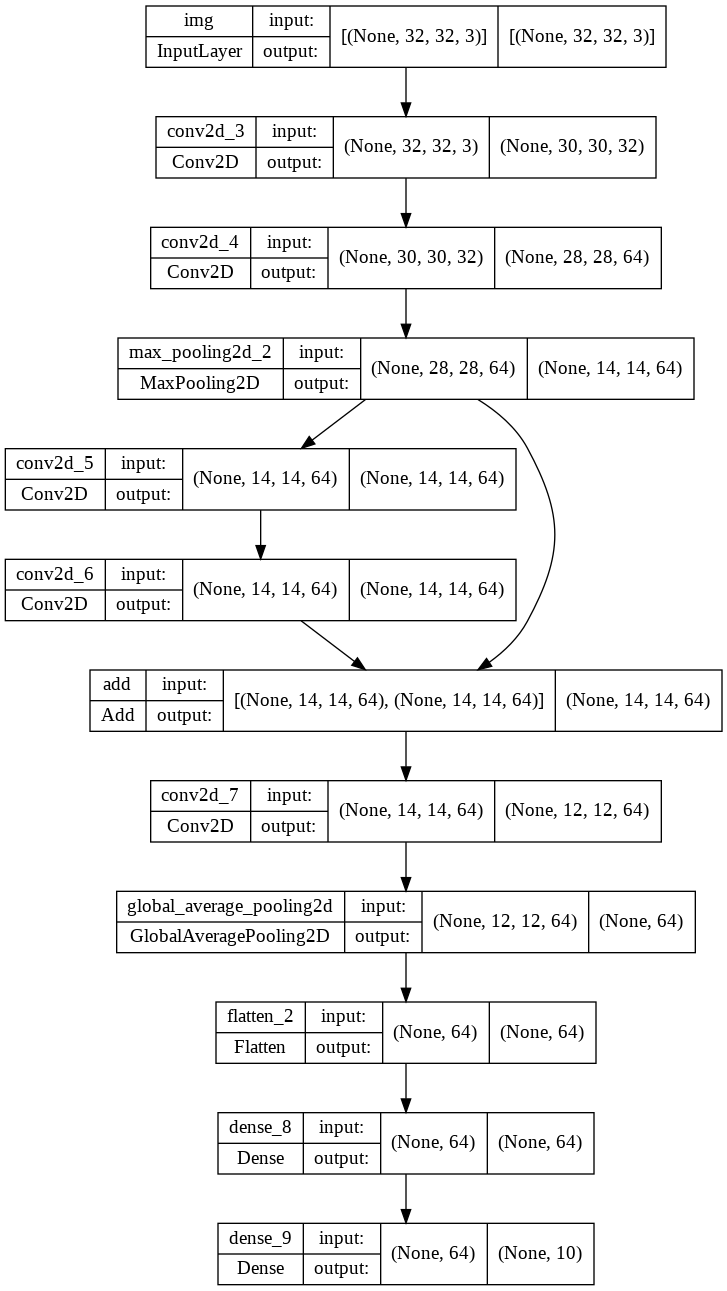

In [40]:
keras.utils.plot_model(model_res, "mini_resnet.png", show_shapes=True)

In [41]:
model_res.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
history = model_res.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.6803 - accuracy: 0.3576 - val_loss: 1.4686 - val_accuracy: 0.4578
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2481 - accuracy: 0.5445 - val_loss: 1.1222 - val_accuracy: 0.5907
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0531 - accuracy: 0.6228 - val_loss: 1.0482 - val_accuracy: 0.6164
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9257 - accuracy: 0.6716 - val_loss: 0.8959 - val_accuracy: 0.6825
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8322 - accuracy: 0.7040 - val_loss: 0.8118 - val_accuracy: 0.7122
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7557 - accuracy: 0.7346 - val_loss: 0.7570 - val_accuracy: 0.7352
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6980 - accuracy: 0.7560 - val_loss: 0.7176 -

313/313 - 2s - loss: 0.6509 - accuracy: 0.7790 - 2s/epoch - 6ms/step


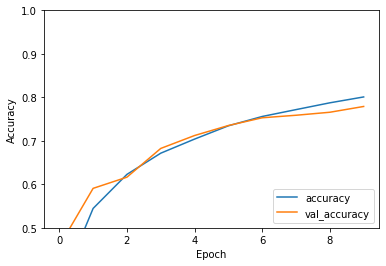

In [43]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_res.evaluate(test_images,  test_labels, verbose=2)

In [44]:
print(test_acc)

0.7789999842643738


# การโหลดข้อมูล

Link: https://www.tensorflow.org/guide/data

tf.data: Build TensorFlow input pipelines : ฟังค์ชันช่วยในการโหลดที่เร็วขึ้นและช่วย augmentation



*   **flow from directory (data path) :** เก็บข้อมูลไว้ใน folder เวลาใช้ก็เรียใช้ข้อมูลใน folder path  นั้น
*   รายการในลิสต์

" batch size : ส่มข้อมูลแบบไม่ใช่คืนในแต่ละ epoch"




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
path2 =  '/content/drive/MyDrive/tensor'

In [46]:
inputs = keras.Input(shape=(80, 80, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_dog_muff = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_dog_muff.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 78, 78, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_9 (Conv2D)              (None, 76, 76, 64)   18496       ['conv2d_8[0][0]']               
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 25, 25, 64)  0           ['conv2d_9[0][0]']               
                                                                                    

In [47]:
# inputs = keras.Input(shape=(80, 80, 3), name="img")
# x = layers.Conv2D(32, 3, activation="relu")(inputs)
# x = layers.Conv2D(64, 3, activation="relu")(x)
# block_1_output = layers.MaxPooling2D(3)(x)

# x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
# x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
# block_2_output = layers.add([x, block_1_output])

# x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
# x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
# block_3_output = layers.add([x, block_2_output, block_1_output])

# x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(256, activation="relu")(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(2)(x)

# resnet_dog_muff = keras.Model(inputs, outputs, name="resnet_dog_muff")
# resnet_dog_muff.summary()

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        directory = path2,
        target_size = (80, 80),
        batch_size=4,
        color_mode= 'rgb',
        class_mode='categorical')

# test_generator = test_datagen.flow_from_dataframe(
#         dataframe = valframe,
#         directory = validation_dir,
#         x_col = 'filename',
#         y_col = 'Sub_class',
#         target_size = (height, width),
#         batch_size=batch_size,
#         color_mode= 'rgb',
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [49]:
from tensorflow.keras import optimizers

In [50]:
resnet_dog_muff.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-10),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [51]:
# ปรับแก้ ให้ loss มันลดลงมากกว่านี้
history = resnet_dog_muff.fit_generator(
    train_generator,
    steps_per_epoch= 7,
    epochs=100,
    verbose =1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
7/7 [==============================] - 9s 718ms/step - loss: 4.0769 - accuracy: 0.4615
Epoch 2/100
7/7 [==============================] - 0s 71ms/step - loss: 3.9379 - accuracy: 0.3846
Epoch 3/100
7/7 [==============================] - 0s 69ms/step - loss: 4.8506 - accuracy: 0.4643
Epoch 4/100
7/7 [==============================] - 0s 67ms/step - loss: 5.1189 - accuracy: 0.5357
Epoch 5/100
7/7 [==============================] - 0s 71ms/step - loss: 3.6796 - accuracy: 0.4231
Epoch 6/100
7/7 [==============================] - 0s 66ms/step - loss: 3.6887 - accuracy: 0.5769
Epoch 7/100
7/7 [==============================] - 0s 72ms/step - loss: 4.7341 - accuracy: 0.4231
Epoch 8/100
7/7 [==============================] - 0s 68ms/step - loss: 3.1184 - accuracy: 0.3846
Epoch 9/100
7/7 [==============================] - 0s 60ms/step - loss: 4.2348 - accuracy: 0.5385
Epoch 10/100
7/7 [==============================] - 0s 68ms/step - loss: 4.3785 - accuracy: 0.5000
Epoch 11/100
7/7 [

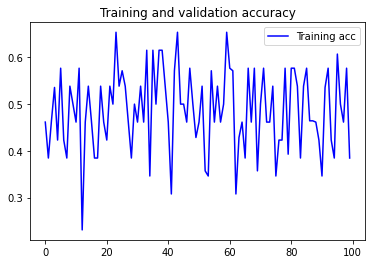

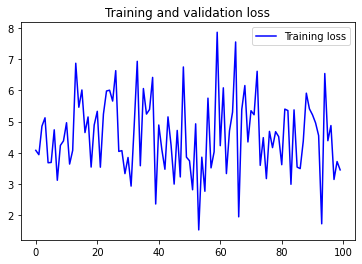

In [52]:
acc = history.history['accuracy']
# val_acc = history.history['val_acc']
loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_x = range(len(acc))

plt.plot(epochs_x, acc, 'b', label='Training acc')
# plt.plot(epochs_x, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_x, loss, 'b', label='Training loss')
# plt.plot(epochs_x, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()